In [27]:
import scipy.io as sio
import numpy as np

In [28]:
Data=sio.loadmat('./intermediate/Feature_vectors.mat')

In [29]:
X=Data['Features_vectors']

In [30]:
X = X.astype(float)

In [31]:
#I transposed it the first time because the next operation of dropping the null values does not work for axis =0 
X=np.transpose(X)

In [32]:
X = X[~np.all(X == 0, axis=1)]

In [33]:
# Itranspose it back to not change the next operations 
X=np.transpose(X)

In [34]:
labels=sio.loadmat('./labels77.mat')

In [35]:
y=labels['labels']

In [36]:
X.dtype

dtype('float64')

In [44]:
y=y[:, 0]

In [45]:
from sklearn.decomposition import PCA
#from sklearn.datasets import load_iris
from sklearn import svm
#from sklearn import cross_validation
from sklearn.model_selection import KFold
iris=load_iris()
kf5=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf5.split(X):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pca = PCA(n_components=2).fit(X_train)
        pca_2d = pca.transform(X_train)
        svmClassifier_2d =   svm.LinearSVC(random_state=111).fit(pca_2d, y_train)


(-1.4831132478252846,
 2.546886752174719,
 -1.6128774511997364,
 1.8471225488002667)

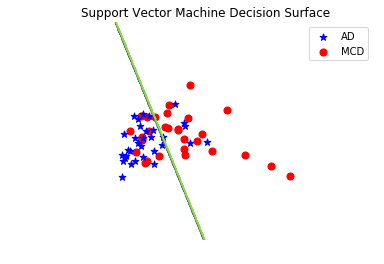

In [46]:
import pylab as pl
import numpy as np
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='o')
    #elif y_train[i] == 2:
    #    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
        pl.legend([c1, c2], ['AD', 'MCD'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')


In [9]:
for train,test in kf5.split(iris.data):
    print('train',train)
    print('test',test)

train [  0   1   2   3   4   5   6   7   8   9  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  30  33  35  36  37  40  42  43  44  45  47
  48  49  50  51  52  53  55  56  58  59  60  61  62  63  64  65  66  69
  71  72  73  74  75  77  79  81  82  83  84  86  87  88  89  91  92  93
  94  95  97  98  99 100 101 103 104 105 107 108 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 129 130 131 133 134 135
 136 137 138 139 140 142 143 144 145 146 147 149]
test [ 10  11  12  22  29  31  32  34  38  39  41  46  54  57  67  68  70  76
  78  80  85  90  96 102 106 109 128 132 141 148]
train [  2   3   4   6   7   8   9  10  11  12  13  14  15  16  18  21  22  24
  27  28  29  31  32  33  34  35  36  37  38  39  41  42  43  44  45  46
  47  49  50  51  52  53  54  55  56  57  58  59  62  63  66  67  68  70
  72  73  74  76  77  78  79  80  81  82  83  85  86  87  90  91  92  95
  96  97  98  99 100 101 102 103 105 106 107 108 109 110 112 113 114 115
 117 11